## Project: WeRateDogs - Wrangle and Analyze Data ##
### Presented by: Paula Munoz ###

### Introduction ###

Throughout this project I will gather, assess and clean data related to the Twitter account  @dog_rates, also knowns as WeRateDogs to create an interesting and trustworthy analysis and visualizations.

I will be using the Twitter's API to obtain the  retweet and favorite count to complement the analysis.

#### About WeRateDogs ####
WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog, and these ratings almost always have a denominator of 10. and the numerator is almost always greater than 10. Some examples of ratings are: 11/10, 12/10, 13/10, etc.



## Data Wrangling ##

### Gathering Data ###

Importing Libraries and loading the data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load twitter Archive dataset
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Download tweet image predictions tsv file from Internet by using requests library
url= "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
#Load tsv file
df_images = pd.read_csv('image_predictions.tsv', sep = '\t')

In [612]:
#Personal Twitter API Key and tokens (Information removed for Project submission)

consumer_key = 'MY_CONSUMER_KEY'
consumer_secret = 'MY_CONSUMER_SECRET'
access_token = 'MY_ACCESS_TOKEN'
access_secret = 'MY_ACCESS_SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify= True)


In [4]:
#Retweet and favorite count for tweet_ids
with open ('tweet_json.txt', 'a', encoding = 'utf-8') as file2:
    for id in df['tweet_id']:
        try:
            tweet = api.get_status(id, tweet_mode = 'extended')
            json.dump(tweet._json, file2)
            file2.write('\n')
        except:
            continue

In [5]:
#Each tweet's JSON data should be written to its own line
tweets_list = []
with open('tweet_json.txt', 'r') as file3:
    for line in file3:
        try:
            tweet = json.loads(line)
            tweets_list.append(tweet)
        except:
            continue


In [6]:
#Creating Dataframe with tweet's information
df_tweets = pd.DataFrame(tweets_list, columns = ['id', 'retweet_count', 'favorite_count'])

## Assessing Data ##

I will make an in depth assessment for the three following datasets:

* df: Contains the twitter Archive data
* df_images: Contains Image Predictions data
* df_tweets: Contains retweet and favorite counts data

The assesment will be done *Visually* and *Programatically*

### Visual Assessment ###

By quickly visually inspecting the datasets I was able to identify some quality and tidiness issues, such as:

#### Quality ####
o	“Source” field from archived dataset (df) is difficult to read, it has unnecessary html tags

#### Tidiness ####
o	Dog stages are listed separately instead of having one column called “Stage”


### Programmatic Assessment ####

In [7]:
#Checking the first five rows of df dataframe
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
#Checking the first five rows of df_images dataframe
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
#Checking the first five rows of df_tweets dataframe
df_tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,8279,37912
1,892177421306343426,6117,32564
2,891815181378084864,4051,24517
3,891689557279858688,8421,41266
4,891327558926688256,9121,39440


In [10]:
#Checking the last five rows of df dataframe
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
#Checking the last five rows of df_images dataframe
df_images.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [12]:
#Checking the last five rows of df_tweets dataframe
df_tweets.tail()

,id,retweet_count,favorite_count
2335,666049248165822465,42,106
2336,666044226329800704,136,292
2337,666033412701032449,43,123
2338,666029285002620928,46,126
2339,666020888022790149,498,2532


In [13]:
#Checking the dimensions of df dataframe
df.shape

(2356, 17)

In [14]:
#Checking the dimensions of df_images dataframe
df_images.shape

(2075, 12)

In [15]:
#Checking the dimensions of df_tweets dataframe
df_tweets.shape

(2340, 3)

In [16]:
#Checking summary of df dataframe as well as the number of non-Null values and Datatypes of the fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
#Checking summary of df_images dataframe as well as the number of non-Null values and Datatypes of the fields
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
#Checking summary of df_tweets dataframe as well as the number of non-Null values and Datatypes of the fields
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
id                2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [19]:
#Checking summary statistics of df dataframe 
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
#Checking summary statistics of df_images dataframe 
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
#Checking summary statistics of df_tweets dataframe 
df_tweets.describe()

,id,retweet_count,favorite_count
count,2.340000e+03,2340.000000,2340.000000
mean,7.422176e+17,2915.453846,7934.817094
std,6.832564e+16,4912.093787,12291.490833
min,6.660209e+17,0.000000,0.000000
25%,6.783394e+17,584.500000,1369.750000
50%,7.186224e+17,1361.000000,3450.500000
75%,7.986954e+17,3395.250000,9709.500000
max,8.924206e+17,83264.000000,163731.000000


In [22]:
#Checking the number of unique values in each column of df dataframe 
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [23]:
#Checking the number of unique values in each column of df_images dataframe 
df_images.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [24]:
#Checking the number of unique values in each column of df_tweets dataframe 
df_tweets.nunique()

id                2340
retweet_count     1718
favorite_count    2001
dtype: int64

In [25]:
#Checking for duplicates in df dataframe 
sum(df.duplicated())

0

In [26]:
#Checking for duplicates in df_images dataframe 
sum(df_images.duplicated())

0

In [27]:
#Checking for duplicates in df_tweets dataframe 
sum(df_tweets.duplicated())

0

In [28]:
#Checking value counts of name from df dataframe
df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Tucker         10
Penny          10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
Buddy           7
an              7
Daisy           7
Toby            7
Bailey          7
Jack            6
Scout           6
Koda            6
Stanley         6
Bella           6
Leo             6
Oscar           6
Rusty           6
Dave            6
Jax             6
Milo            6
Larry           5
             ... 
Jiminus         1
Kobe            1
Wishes          1
Glacier         1
Asher           1
Georgie         1
Tess            1
Marq            1
Joey            1
Chesterson      1
Gert            1
Chesney         1
Tedders         1
Jeffrie         1
Nico            1
Bobbay          1
Bauer           1
Nugget          1
Tycho           1
Rooney          1
Alfy            1
Marvin          1
Sage            1
Raphael         1
Walker    

In [29]:
#More Checking on name field df dataframe
df.name.value_counts().sort_index()

Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old         

In [30]:
#Checking value counts for rating_numerator from df dataframe
df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [31]:
#Checking value counts for rating_denominator from df dataframe
df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

### Quality ###

#### df dataframe ####

* name field has entries that are not real names such as "a", "actually", "the"
* There are tweets not related to dogs, but instead related to other animals and other things.
* Several records showing "None" for name field
* rating_numerator has values with less than "10" or too high (with three or more digits)
* rating_denominator has values different than "10"
* Data contains retweets which means there are duplicates
* Source field difficult to read/ understand

#### df_images dataframe ####

* Values showing under P1, P2, and P3 which are meant to be dog's breed may not be an actual dog breed

#### df_tweets dataframe ####

* Column referring to tweet id is called "id" instead of "tweet_id"


### Tidiness ###

#### df dataframe ####

* Dog stages such as: doggo, floofer, pupper and puppo showing in separate columns

#### df_images dataframe ####

* P1, P2, and P3 which are meant to be dog's breed are in different columns.

# Cleaning Data #

In [136]:
#Before starting with cleaning tasks, I will make a copy of all three datasets to preserve original data

df_clean = df.copy()
df_images_clean = df_images.copy()
df_tweets_clean = df_tweets.copy()

## Quality - 1 ##

#### Define ####

Correct column name from df_tweets_clean referring to tweet id which is currently called "id" to "tweet_id" to keep consistency with other two datasets and help the join process to be smoother

#### Code ####

In [137]:
#renaming id to tweet_id for consistency with other datasets
df_tweets_clean = df_tweets_clean.rename(columns={"id": "tweet_id"})

#### Test ####

In [138]:
df_tweets_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8279,37912
1,892177421306343426,6117,32564
2,891815181378084864,4051,24517
3,891689557279858688,8421,41266
4,891327558926688256,9121,39440


## Tidiness  - 1 ##

#### Define ####

Join/ merge all three dataframes for better understanding of the data

#### Code ####

In [139]:
#Joining df_clean with df_images_clean and dropping records with missing images
df_clean = pd.merge(df_clean, df_images_clean, on = 'tweet_id', how = 'inner')

#Joining df_clean with df_tweets_clean and dropping records with missing images
df_clean = pd.merge(df_clean, df_tweets_clean, on = 'tweet_id', how = 'inner')

#### Test ####

In [140]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 30 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
jpg_url                       2067 

## Tidiness - 2 ##

#### Define ####

Create a *breed* Column to remove individual columns related to breed, such as p1, p1_conf, p1_dog...

#### Code ####

In [141]:
#Creating separate breeds_df dataframe to investigate different breeds columns
#to later keep the best match
#The best match will be determined based on 'px_dog' == True

breeds_df = df_clean

breeds_df['breed'] = [i['p1'] if i['p1_dog'] == True
                          else i['p2'] if i['p2_dog'] == True
                          else i['p3'] if i['p3_dog'] == True
                          else 'None' for index, i in breeds_df.iterrows() ]

In [142]:
#Cheking best_breed values
breeds_df.breed.value_counts()

None                              323
golden_retriever                  173
Labrador_retriever                113
Pembroke                           95
Chihuahua                          93
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            45
Pomeranian                         42
malamute                           34
cocker_spaniel                     33
Chesapeake_Bay_retriever           31
French_bulldog                     30
miniature_pinscher                 26
Cardigan                           23
Eskimo_dog                         22
Staffordshire_bullterrier          22
beagle                             21
German_shepherd                    21
Shih-Tzu                           20
Siberian_husky                     20
Lakeland_terrier                   19
Maltese_dog                        19
Shetland_sheepdog                  19
Rottweiler                         19
kuvasz      

In [143]:
#Updating df_clean dataframe to keep only relevant records
df_clean= pd.concat([df_clean, breeds_df]).drop_duplicates(['tweet_id'],keep='last')

In [144]:
#Keep records where breed is different to "None" 
df_clean = df_clean[df_clean.breed != 'None']

In [145]:
#Drop individual columns related to breed
columns = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
df_clean = df_clean.drop(columns, axis = 1)

#### Test ####

In [146]:
df_clean.breed.value_counts()

golden_retriever                  173
Labrador_retriever                113
Pembroke                           95
Chihuahua                          93
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            45
Pomeranian                         42
malamute                           34
cocker_spaniel                     33
Chesapeake_Bay_retriever           31
French_bulldog                     30
miniature_pinscher                 26
Cardigan                           23
Eskimo_dog                         22
Staffordshire_bullterrier          22
beagle                             21
German_shepherd                    21
Shih-Tzu                           20
Siberian_husky                     20
Lakeland_terrier                   19
Maltese_dog                        19
Shetland_sheepdog                  19
Rottweiler                         19
kuvasz                             19
Italian_grey

In [147]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1744 entries, 1 to 2066
Data columns (total 22 columns):
tweet_id                      1744 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1744 non-null object
source                        1744 non-null object
text                          1744 non-null object
retweeted_status_id           60 non-null float64
retweeted_status_user_id      60 non-null float64
retweeted_status_timestamp    60 non-null object
expanded_urls                 1744 non-null object
rating_numerator              1744 non-null int64
rating_denominator            1744 non-null int64
name                          1744 non-null object
doggo                         1744 non-null object
floofer                       1744 non-null object
pupper                        1744 non-null object
puppo                         1744 non-null object
jpg_url                       1744 

## Quality - 2 ##

#### Define ####

Remove records from df_clean dataframe that contains retweets, thus will help to remove duplicate records

#### Code ####

In [148]:
#Checking the number of records that contains data on retweeted_status_id
len(df_clean[df_clean.retweeted_status_id.isnull() == False])

60

In [149]:
#Removing the records that contains data on retweeted_status_id
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]

#### Test ####

In [150]:
#Checking to make sure that there are no records that contains data on retweeted_status_id
len(df_clean[df_clean.retweeted_status_id.isnull() == False])

0

In [151]:
#Checking info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 1 to 2066
Data columns (total 22 columns):
tweet_id                      1684 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1684 non-null object
source                        1684 non-null object
text                          1684 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1684 non-null object
rating_numerator              1684 non-null int64
rating_denominator            1684 non-null int64
name                          1684 non-null object
doggo                         1684 non-null object
floofer                       1684 non-null object
pupper                        1684 non-null object
puppo                         1684 non-null object
jpg_url                       1684 non

## Quality - 3 ##

#### Define ####

After removing retweets records the fields: *retweeted_status_id*, *retweeted_status_user_id* and *retweeted_status_timestamp* now contains no information, thus we should proceed to remove these columns, since they are no longer relevant.

#### Code ####

In [152]:
#Dropping Columns
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test ####

In [153]:
#Checking Info to make sure the three columns were removed
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 1 to 2066
Data columns (total 19 columns):
tweet_id                 1684 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1684 non-null object
source                   1684 non-null object
text                     1684 non-null object
expanded_urls            1684 non-null object
rating_numerator         1684 non-null int64
rating_denominator       1684 non-null int64
name                     1684 non-null object
doggo                    1684 non-null object
floofer                  1684 non-null object
pupper                   1684 non-null object
puppo                    1684 non-null object
jpg_url                  1684 non-null object
img_num                  1684 non-null int64
retweet_count            1684 non-null int64
favorite_count           1684 non-null int64
breed                    1684 non-null object
dtypes: float64(2), int64(6

## Quality - 4 ##

#### Define ####

Clean the *source* field from df_clean dataframe to remove URLs and tags and make the *source* field is more readable 

#### Code ####

In [154]:
#Checking source field from df_clean
df_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1654
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       22
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       8
Name: source, dtype: int64

In [155]:
#Clean Twitter for iPhone records
df_clean['source'] = df_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone' )

#Clean Twitter Web Client records
df_clean['source'] = df_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client' )

#Clean Twieet Deck records
df_clean['source'] = df_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test ####

In [156]:
#Veryfying Source fields are now clean
df_clean['source'].value_counts()


Twitter for iPhone    1654
Twitter Web Client      22
TweetDeck                8
Name: source, dtype: int64

## Quality - 5 ##

#### Define ####

Clean *name* field which has entries that are not real names such as "a", "actually", "the", and do some research by looking at the *text* field to find out if there are real Dog names

#### Code ####

In [157]:
#Number of records that contain names with lowercase which may be incorrect names
#such as "a", "actually", "the"
len(df_clean[df_clean.name.str.islower()])

80

In [158]:
#Save these specific records (with lowercase names) to a dataframe for further analysis
lowercase_names = df_clean[df_clean.name.str.islower()]

#Modifying max_colwidth to read sample text to see if there is a different way to identify dog's name
pd.options.display.max_colwidth =180

#Get sample tweets to analyze text and search for patterns that would help
#us identify the real dog name
lowercase_names['text'].sample(10)

833       This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt
2059    Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt
686           This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB
897     We only rate dogs. Please stop sending in non-canines like this Alaskan Flop Turtle. This is very frustrating. 10/10 https://t.co/qXteK6Atxc
810     This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd
817     This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1347    This is the newly formed pupper a capella group. They're just starting out but I see tons of poten

In [159]:
#By looking at the sample texts, we can see that there could be tweets with real Dog names
#and most of these tweets contained the words "name" or "named"

#Retrieving the records from lowercase_names that contain words "name", this will also inclued "named"

lowercase_names[lowercase_names.text.str.contains("name")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,retweet_count,favorite_count,breed
686,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,my,None,None,None,None,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1,3663,27941,Pembroke
1574,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,Twitter for iPhone,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,None,None,None,None,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,1,102,662,English_springer
1671,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,Twitter for iPhone,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,a,None,None,None,None,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,1,371,1127,pug
1750,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,Twitter for iPhone,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,a,None,None,None,None,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,1,236,747,toy_poodle
1781,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,Twitter for iPhone,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,a,None,None,None,None,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,1,230,683,Yorkshire_terrier
1831,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,Twitter for iPhone,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9,10,a,None,None,None,None,https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg,1,167,525,toy_terrier
1843,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,Twitter for iPhone,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,a,None,None,None,None,https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg,1,139,433,Shetland_sheepdog
1875,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,Twitter for iPhone,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,https://twitter.com/dog_rates/status/669564461267722241/photo/1,10,10,a,None,None,None,None,https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg,1,127,391,toy_poodle
1904,668955713004314625,NaN,NaN,2015-11-24 00:54:05 +0000,Twitter for iPhone,This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow! https://t.co/Dmy2mY2Qj5,https://twitter.com/dog_rates/status/668955713004314625/photo/1,10,10,a,None,None,None,None,https://pbs.twimg.com/media/CUibq3uVAAAup_O.jpg,1,73,283,cocker_spaniel
1917,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,Twitter for iPhone,This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg,https://twitter.com/dog_rates/status/668636665813057536/photo/1,10,10,an,None,None,None,None,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,499,1052,komondor


In [160]:
#Assign to new lowercase_names dataframe only the 22 records that contain a name:

lowercase_names = lowercase_names[lowercase_names.text.str.contains("name")]

len(lowercase_names)

19

In [161]:
#ignore warnings
warnings.filterwarnings("ignore")

In [162]:
#Extracting dog names where text contains the word "named"
extract_name = lowercase_names[lowercase_names.text.str.contains("name")]

named =extract_name['text'].str.extract(r"named\s(\w+)")
named =named[named.isnull()==False]
named

1574        Wylie
1671          Kip
1750        Jacob
1781        Rufus
1831        Spork
1843        Hemry
1875      Alfredo
1904        Leroi
1917        Berta
1930         Chuk
1947      Alfonso
1961       Cheryl
1967      Jessiga
1976        Klint
1985         Kohl
2022    Octaviath
2025         Johm
Name: text, dtype: object

In [163]:
#Extracting dog names where text contains "name is"
name_is =extract_name['text'].str.extract(r"name is\s(\w+)")
name_is = name_is[name_is.isnull()== False]
name_is

686      Zoey
1999    Daryl
Name: text, dtype: object

In [164]:
#Appending name and name is results to new name
new_name =named.append(name_is)
new_name

1574        Wylie
1671          Kip
1750        Jacob
1781        Rufus
1831        Spork
1843        Hemry
1875      Alfredo
1904        Leroi
1917        Berta
1930         Chuk
1947      Alfonso
1961       Cheryl
1967      Jessiga
1976        Klint
1985         Kohl
2022    Octaviath
2025         Johm
686          Zoey
1999        Daryl
Name: text, dtype: object

In [165]:
#In lowercase_names dataframe replace "name" values with newly found Dog names
lowercase_names['name'] = new_name
lowercase_names.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,retweet_count,favorite_count,breed
686,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,Zoey,None,None,None,None,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1,3663,27941,Pembroke
1574,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,Twitter for iPhone,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,Wylie,None,None,None,None,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,1,102,662,English_springer
1671,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,Twitter for iPhone,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,Kip,None,None,None,None,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,1,371,1127,pug
1750,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,Twitter for iPhone,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,Jacob,None,None,None,None,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,1,236,747,toy_poodle
1781,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,Twitter for iPhone,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,Rufus,None,None,None,None,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,1,230,683,Yorkshire_terrier


In [166]:
#Update dog names in df_clean dataframe for tweet_ids where a new dog name was found
df_clean= pd.concat([df_clean, lowercase_names]).drop_duplicates(['tweet_id'],keep='last')

#### Test ####

In [167]:
#Checking individual records where we know a new dog name should be assigned to make sure name was replaced
df_clean[df_clean.tweet_id == 765395769549590528 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,retweet_count,favorite_count,breed
686,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,Zoey,None,None,None,None,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1,3663,27941,Pembroke


In [168]:
#Checking again for lowercase names the count has been reduced from 98 to 76
len(df_clean[df_clean.name.str.islower()])

61

In [169]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 1 to 2025
Data columns (total 19 columns):
tweet_id                 1684 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1684 non-null object
source                   1684 non-null object
text                     1684 non-null object
expanded_urls            1684 non-null object
rating_numerator         1684 non-null int64
rating_denominator       1684 non-null int64
name                     1684 non-null object
doggo                    1684 non-null object
floofer                  1684 non-null object
pupper                   1684 non-null object
puppo                    1684 non-null object
jpg_url                  1684 non-null object
img_num                  1684 non-null int64
retweet_count            1684 non-null int64
favorite_count           1684 non-null int64
breed                    1684 non-null object
dtypes: float64(2), int64(6

In [170]:
#Checking names
df_clean['name'].value_counts()

None          419
a              29
Cooper         10
Lucy           10
Charlie         9
Tucker          9
Oliver          9
Penny           8
Daisy           7
the             7
Sadie           7
Winston         7
Toby            6
Lola            6
Koda            6
Jax             6
Oscar           5
Rusty           5
Leo             5
Stanley         5
Bella           5
Bo              5
Larry           4
Dave            4
Cassie          4
Gus             4
Duke            4
Dexter          4
Bentley         4
Maggie          4
             ... 
Mason           1
Goliath         1
Yoda            1
Ruffles         1
Ace             1
Jeffri          1
Cali            1
Terrance        1
Reagan          1
Jazz            1
Rumble          1
Quinn           1
Kevon           1
incredibly      1
Mingus          1
Dawn            1
Florence        1
Johm            1
Ginger          1
Timison         1
Stella          1
Ben             1
Bobb            1
Lassie          1
Berta     

## Quality - 6 ##

#### Define ####

Identify and remove tweets that may no be related to Dogs.

While analyzing the text to find valid dog names, I found many tweets that were not related to dogs, but instead related to other animals and other things.

These tweets contained phrases such as: 
"don't rate",
"stop sending",
"only send dogs",
"only rate dos",
"whithout dog"


#### Code ####

In [171]:
#Save these specific records to their own dataframes
no_dog = df_clean[df_clean.text.str.contains("don't rate|stop sending|only send dogs|only rate|without a dog| without dog")]

#sample text to make sure these are irrelevant tweets
no_dog['text'].sample(5)


1000                             This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9
583                                             Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC
1131                               Really guys? Again? I know this is a rare Albanian Bingo Seal, but we only rate dogs. Only send in dogs... 9/10 https://t.co/6JYLpUmBrC
56               Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4
153     Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
Name: text, dtype: object

In [172]:
#Assign name: "no_dog" to records no relevant to dogs
no_dog['name'] = 'no_dog'

#Number of records
len(no_dog)

68

In [173]:
#Update dog names in df_clean dataframe for tweet_ids no relevant to dogs
df_clean= pd.concat([df_clean, no_dog]).drop_duplicates(['tweet_id'],keep='last')

In [174]:
#Check name value counts to make sure names were updated to "no_dog", 
#to later remove these records
df_clean['name'].value_counts()

None        371
no_dog       68
a            22
Lucy         10
Cooper       10
Oliver        9
Tucker        9
Charlie       9
Penny         8
Winston       7
Sadie         7
Daisy         7
the           6
Jax           6
Toby          6
Koda          6
Lola          6
Stanley       5
Rusty         5
Bella         5
Bo            5
Oscar         5
Leo           5
Oakley        4
Maggie        4
Brody         4
Bentley       4
Dexter        4
Larry         4
Chester       4
           ... 
Mason         1
Goliath       1
Yoda          1
Ruffles       1
Ace           1
Jeffri        1
Buckley       1
Jazz          1
Rolf          1
Kramer        1
Callie        1
Reagan        1
Rumble        1
Quinn         1
Kevon         1
Mingus        1
Dawn          1
Florence      1
Johm          1
Ginger        1
Timison       1
Stella        1
Ben           1
Bobb          1
Lassie        1
Berta         1
Jamesy        1
Odin          1
Penelope      1
Chuk          1
Name: name, Length: 860,

In [175]:
#Keep records where name is different to "no_dog" 
df_clean = df_clean[df_clean.name != 'no_dog']

#### Test ####

In [176]:
#Veryfing there are no longer "no_dog" names
df_clean['name'].value_counts()

None        371
a            22
Cooper       10
Lucy         10
Charlie       9
Oliver        9
Tucker        9
Penny         8
Sadie         7
Daisy         7
Winston       7
Jax           6
the           6
Toby          6
Koda          6
Lola          6
Leo           5
Bella         5
Oscar         5
Bo            5
Rusty         5
Stanley       5
George        4
Brody         4
Dexter        4
Larry         4
Maggie        4
Reggie        4
Bentley       4
Cassie        4
           ... 
Mason         1
Goliath       1
Yoda          1
Ruffles       1
Ace           1
Jeffri        1
Buckley       1
Jazz          1
Rolf          1
Kramer        1
Callie        1
Reagan        1
Rumble        1
Quinn         1
Kevon         1
Mingus        1
Dawn          1
Florence      1
Johm          1
Ginger        1
Timison       1
Stella        1
Ben           1
Bobb          1
Lassie        1
Berta         1
Jamesy        1
Odin          1
Penelope      1
Chuk          1
Name: name, Length: 859,

In [177]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1616 entries, 1 to 2025
Data columns (total 19 columns):
tweet_id                 1616 non-null int64
in_reply_to_status_id    19 non-null float64
in_reply_to_user_id      19 non-null float64
timestamp                1616 non-null object
source                   1616 non-null object
text                     1616 non-null object
expanded_urls            1616 non-null object
rating_numerator         1616 non-null int64
rating_denominator       1616 non-null int64
name                     1616 non-null object
doggo                    1616 non-null object
floofer                  1616 non-null object
pupper                   1616 non-null object
puppo                    1616 non-null object
jpg_url                  1616 non-null object
img_num                  1616 non-null int64
retweet_count            1616 non-null int64
favorite_count           1616 non-null int64
breed                    1616 non-null object
dtypes: float64(2), int64(6

## Quality - 7 ##

#### Define ####

Further analysis on tweets with name "a" since this is the second highest name in dataset, and doesn't seen to be a valid name

#### Code ####


In [178]:
#Records which have "a", "an", "all" as name
df_clean[df_clean.name.str.match('a')]



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,retweet_count,favorite_count,breed
50,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,Twitter for iPhone,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None,https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg,1,15570,48394,Samoyed
817,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,Twitter for iPhone,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,1,1050,3084,kuvasz
819,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,Twitter for iPhone,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,1,1240,5074,Pembroke
833,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,Twitter for iPhone,This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt,https://twitter.com/dog_rates/status/746369468511756288/photo/1,9,10,an,None,None,None,None,https://pbs.twimg.com/media/ClujESVXEAA4uH8.jpg,1,1751,6452,German_shepherd
854,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,Twitter for iPhone,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,2022,6468,kuvasz
937,728035342121635841,NaN,NaN,2016-05-05 01:35:26 +0000,Twitter for iPhone,This is all I want in my life. 12/10 for super sleepy pupper https://t.co/4RlLA5ObMh,"https://twitter.com/dog_rates/status/728035342121635841/photo/1,https://twitter.com/dog_rates/status/728035342121635841/photo/1",12,10,all,None,None,pupper,None,https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg,1,1762,4727,Pomeranian
1117,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,Twitter for iPhone,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,https://twitter.com/dog_rates/status/704859558691414016/photo/1,10,10,a,None,None,pupper,None,https://pbs.twimg.com/media/CcgqBNVW8AE76lv.jpg,1,578,2346,pug
1126,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,None,None,None,None,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,964,3040,Great_Pyrenees
1136,703079050210877440,NaN,NaN,2016-02-26 04:48:02 +0000,Twitter for iPhone,This is a Butternut Cumberfloof. It's not windy they just look like that. 11/10 back at it again with the red socks https://t.co/hMjzhdUHaW,"https://twitter.com/dog_rates/status/703079050210877440/photo/1,https://twitter.com/dog_rates/status/703079050210877440/photo/1",11,10,a,None,None,None,None,https://pbs.twimg.com/media/CcHWqQCW8AEb0ZH.jpg,2,3286,7723,Pembroke
1142,702539513671897089,NaN,NaN,2016-02-24 17:04:07 +0000,Twitter for iPhone,This is a Wild Tuscan Poofwiggle. Careful not to startle. Rare tongue slip. One eye magical. 12/10 would def pet https://t.co/4EnShAQjv6,"https://twitter.com/dog_rates/status/702539513671897089/

In [179]:
#Save these specific records to a dataframe called a_names for further analysis
a_names = df_clean[df_clean.name.str.match('a')]

#read sample text to see if there is a different way to identify dog's name
a_names['text'].sample(10)


1911       This is a wild Toblerone from Papua New Guinea. Mouth always open. Addicted to hay. Acts blind. 7/10 handsome dog https://t.co/IGmVbz07tZ
833       This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt
854       This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa
1710                                            This is a baby Rand Paul. Curls for days. 11/10 would cuddle the hell out of https://t.co/xHXNaPAYRe
1257     This is a rare Arctic Wubberfloof. Unamused by the happenings. No longer has the appetites. 12/10 would totally hug https://t.co/krvbacIX0N
2058                    My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O
817     This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be 

In [180]:
#After reading a couple of sample text, the pattern is that there is no 
#real Dog name for this tweets, thus I will update the name to "None"

a_names['name'] = 'None'

#Update dog names in df_clean dataframe
df_clean= pd.concat([df_clean, a_names]).drop_duplicates(['tweet_id'],keep='last')

#### Test ####

In [181]:
#Veryfing there are no longer names with a

df_clean['name'].value_counts()

None        397
Cooper       10
Lucy         10
Tucker        9
Oliver        9
Charlie       9
Penny         8
Winston       7
Sadie         7
Daisy         7
Koda          6
Toby          6
Jax           6
Lola          6
the           6
Bo            5
Rusty         5
Stanley       5
Bella         5
Leo           5
Oscar         5
Oakley        4
Dexter        4
Dave          4
Bailey        4
Jack          4
Maggie        4
Bentley       4
Scooter       4
Winnie        4
           ... 
Crimson       1
Mason         1
Goliath       1
Ruffles       1
Ace           1
Jeffri        1
Terrance      1
Kramer        1
Joey          1
Penelope      1
Rolf          1
Callie        1
Reagan        1
Rumble        1
Quinn         1
Kevon         1
Mingus        1
Dawn          1
Florence      1
Johm          1
Ginger        1
Timison       1
Stella        1
Ben           1
Bobb          1
Lassie        1
Berta         1
Jamesy        1
Odin          1
Chuk          1
Name: name, Length: 856,

## Quality - 8 ##

#### Define ####

Investigate and clean *name* field which has "None" as the name to identify if there could be posibly real Dog names.

#### Code ####

In [182]:
#Count the number of records which have "None" as name
len(df_clean[df_clean.name.str.contains("None")])

397

In [183]:
#Save these specific records to a dataframe called none_names for further analysis
none_names = df_clean[df_clean.name.str.contains("None")]

#read sample text to see if there is a different way to identify dog's name
none_names['text'].sample(10)

766                                                                                      Nothing better than a doggo and a sunset. 10/10 majestic af https://t.co/xVSodF19PS
1398                                  Here we see a nifty leaping pupper. Feet look deadly. Sad that the holidays are over. 9/10 undeniably huggable https://t.co/ny8mnXhGOW
2033                                       Oh boy what a pup! Sunglasses take this one to the next level. Weirdly folds front legs. Pretty big. 6/10 https://t.co/yECbFrSArM
343     We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10\n\nhttps://t.co/XQlmPTLHPl https://t.co/ZNIkkHgtYE
931                                                                        When you're way too slow for the "down low" portion of a high five. 13/10 https://t.co/Cofwoy7Vpq
157      Sometimes you guys remind me just how impactful a pupper can be. Cooper will be remembered as a good boy by so many. 14/10 res

In [184]:
#As with lowercase_names dataframe there could be real name dogs that can 
#be extracted fron text field, I will look for records with the words "name" or "named"


#Extracting dog names where text contains the word "named"
valid_none_names = none_names[none_names.text.str.contains("name")]

named_v = valid_none_names['text'].str.extract(r"named\s(\w+)")
named_v =named_v[named_v.isnull()==False]
named_v

#Extracting dog names where text contains "name is"
name_is_v =valid_none_names['text'].str.extract(r"name is\s(\w+)")
name_is_v = name_is_v[name_is_v.isnull()== False]
name_is_v

#Appending new name results
new_name_v =named_v.append(name_is_v)
new_name_v

#In new valid_none_names dataframe replace "name" values with newly found Dog names

valid_none_names['name'] = new_name_v

valid_none_names['name'].value_counts()

Zoey          1
Sabertooth    1
Big           1
Tickles       1
Zeus          1
Guss          1
Name: name, dtype: int64

In [185]:
#Update dog names in df_clean dataframe for tweet_ids where a new dog name was found
df_clean= pd.concat([df_clean, valid_none_names]).drop_duplicates(['tweet_id'],keep='last')

In [186]:
#Remove records with possible NaN
df_clean = df_clean.dropna(subset=['name'])


#### Test ####


In [187]:
#Checking value counts for names, and veryfing "None" values have been reduced
df_clean['name'].value_counts()

None        388
Lucy         10
Cooper       10
Charlie       9
Oliver        9
Tucker        9
Penny         8
Winston       7
Sadie         7
Daisy         7
Koda          6
the           6
Jax           6
Toby          6
Lola          6
Bella         5
Zoey          5
Leo           5
Stanley       5
Bo            5
Oscar         5
Rusty         5
Maggie        4
Chester       4
Scout         4
Larry         4
Dexter        4
Brody         4
Bentley       4
Oakley        4
           ... 
Mason         1
Goliath       1
Ruffles       1
Ace           1
Jeffri        1
Kawhi         1
Buckley       1
Jazz          1
Rolf          1
Kramer        1
Callie        1
Reagan        1
Rumble        1
Quinn         1
Kevon         1
Mingus        1
Dawn          1
Florence      1
Johm          1
Ginger        1
Timison       1
Stella        1
Ben           1
Bobb          1
Lassie        1
Berta         1
Jamesy        1
Odin          1
Penelope      1
Chuk          1
Name: name, Length: 860,

In [188]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613 entries, 1 to 1981
Data columns (total 19 columns):
tweet_id                 1613 non-null int64
in_reply_to_status_id    18 non-null float64
in_reply_to_user_id      18 non-null float64
timestamp                1613 non-null object
source                   1613 non-null object
text                     1613 non-null object
expanded_urls            1613 non-null object
rating_numerator         1613 non-null int64
rating_denominator       1613 non-null int64
name                     1613 non-null object
doggo                    1613 non-null object
floofer                  1613 non-null object
pupper                   1613 non-null object
puppo                    1613 non-null object
jpg_url                  1613 non-null object
img_num                  1613 non-null int64
retweet_count            1613 non-null int64
favorite_count           1613 non-null int64
breed                    1613 non-null object
dtypes: float64(2), int64(6

## Tidiness - 3 ##

#### Define ####

Create a *stage* variable to remove individual dog stage columns


In [189]:
df_clean['doggo'].value_counts()


None     1551
doggo      62
Name: doggo, dtype: int64

In [190]:
df_clean['floofer'].value_counts()


None       1606
floofer       7
Name: floofer, dtype: int64

In [191]:
df_clean['pupper'].value_counts()


None      1438
pupper     175
Name: pupper, dtype: int64

In [192]:
df_clean['puppo'].value_counts()


None     1591
puppo      22
Name: puppo, dtype: int64


#### Code ####

In [193]:
#Create column stage with corresponding stage names
df_clean['stage'] = df_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

#drop individual stage columns
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1 , inplace = True)

#### Test ####

In [194]:
df_clean['stage'].value_counts()

None       1355
pupper      175
doggo        54
puppo        22
floofer       7
Name: stage, dtype: int64

In [195]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613 entries, 1 to 1981
Data columns (total 16 columns):
tweet_id                 1613 non-null int64
in_reply_to_status_id    18 non-null float64
in_reply_to_user_id      18 non-null float64
timestamp                1613 non-null object
source                   1613 non-null object
text                     1613 non-null object
expanded_urls            1613 non-null object
rating_numerator         1613 non-null int64
rating_denominator       1613 non-null int64
name                     1613 non-null object
jpg_url                  1613 non-null object
img_num                  1613 non-null int64
retweet_count            1613 non-null int64
favorite_count           1613 non-null int64
breed                    1613 non-null object
stage                    1613 non-null object
dtypes: float64(2), int64(6), object(8)
memory usage: 214.2+ KB


## Quality - 9 ##

#### Define ####

There are many records with "None" Stage, analyze text to identify possible stages for these records

#### Code ####

In [196]:
df_clean['stage'].value_counts()

None       1355
pupper      175
doggo        54
puppo        22
floofer       7
Name: stage, dtype: int64

In [197]:
#Create separate dataframe to analyze None values for stage variable
none_stage= df_clean[df_clean.stage.str.contains("None")]

#Extracting the records that contain words "pupper"
n_pupper = none_stage[none_stage.text.str.contains("pupper")]
n_pupper['stage'] = 'pupper'

#Extracting the records that contain words "doggo"
n_doggo = none_stage[none_stage.text.str.contains("doggo")]
n_doggo['stage'] = 'doggo'

#Extracting the records that contain words "puppo"
n_puppo = none_stage[none_stage.text.str.contains("puppo")]
n_puppo['stage'] = 'puppo'

#Extracting the records that contain words "floofer" but there were none
n_floofer = none_stage[none_stage.text.str.contains("floofer")]
n_floofer['stage'] = 'floofer'

In [198]:
len(n_pupper)
len(n_doggo)
len(n_puppo)
len(n_floofer)

0

In [199]:
#Update stage in none_stage dataframe, I'm not updatting floofer since there were 0 updates
none_stage= pd.concat([none_stage, n_pupper]).drop_duplicates(['tweet_id'],keep='last')
none_stage= pd.concat([none_stage, n_doggo]).drop_duplicates(['tweet_id'],keep='last')
none_stage= pd.concat([none_stage, n_puppo]).drop_duplicates(['tweet_id'],keep='last')

In [200]:
#Update stage on df_clean dataframe
df_clean= pd.concat([df_clean, none_stage]).drop_duplicates(['tweet_id'],keep='last')


#### Test ####

In [201]:
df_clean['stage'].value_counts()

None       1329
pupper      192
doggo        58
puppo        27
floofer       7
Name: stage, dtype: int64

In [202]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613 entries, 9 to 437
Data columns (total 16 columns):
tweet_id                 1613 non-null int64
in_reply_to_status_id    18 non-null float64
in_reply_to_user_id      18 non-null float64
timestamp                1613 non-null object
source                   1613 non-null object
text                     1613 non-null object
expanded_urls            1613 non-null object
rating_numerator         1613 non-null int64
rating_denominator       1613 non-null int64
name                     1613 non-null object
jpg_url                  1613 non-null object
img_num                  1613 non-null int64
retweet_count            1613 non-null int64
favorite_count           1613 non-null int64
breed                    1613 non-null object
stage                    1613 non-null object
dtypes: float64(2), int64(6), object(8)
memory usage: 214.2+ KB


## Quality - 10 ##

#### Define ####

Clean *rating_numerator* column since it has very low values (below 4) or extremely high values (Over 15)

#### Code ####

In [203]:
#Checking rating_numerator values
df_clean.rating_numerator.value_counts().sort_index()

0        1
1        1
2        2
3        4
4        7
5       12
6       16
7       31
8       66
9      121
10     343
11     341
12     407
13     223
14      22
24       1
26       1
27       1
44       1
45       1
50       1
60       1
75       1
80       1
84       1
88       1
99       1
121      1
143      1
144      1
165      1
Name: rating_numerator, dtype: int64

In [204]:
#Reviewing text for rating_numerators > 14
df_clean[df_clean.rating_numerator >14 ]['text']

609             This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
341                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
411     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
553                                              This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
730                                                                                                Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
996                                                         This is Bluebert. He just saw that both #FinalFur 

In [205]:
#After analyzing the text for rating numerators greater than 14, I have decidied that I will divide the numerator by 10
#I will do the same with high denominator values
df_clean['rating_numerator'] = [i['rating_numerator'] if i['rating_numerator'] <= 14
                                 else int(i['rating_numerator']/10) for index, i in df_clean.iterrows()]

In [206]:
#Reviewing text for rating_numerators <=4
df_clean[df_clean.rating_numerator <= 4]['text']

609             This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
245                                                             When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
411     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
610                                  This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M
962                                                                                                              Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
986                                          This is Alexanderson. He's got a weird ass birth mark. Dreadful a

In [207]:
#After reviewing text, I decided to remove records where rating_numerator is >= 4 since records
#with lower numerator ratins don't seem to be relevant

df_clean = df_clean[df_clean.rating_numerator >= 4]


#### Test ####

In [208]:
#Veryfing I no longer have rating_numerators with very low or very high values
df_clean.rating_numerator.value_counts().sort_index()

4       9
5      13
6      17
7      32
8      69
9     122
10    343
11    341
12    408
13    223
14     24
16      1
Name: rating_numerator, dtype: int64

## Quality - 11 ##

#### Define ####

Clean *rating_denominator* column since it has values over 10

#### Code ####

In [209]:
#Checking rating_numerator values
df_clean.rating_denominator.value_counts().sort_index()

10     1587
11        2
20        1
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
Name: rating_denominator, dtype: int64

In [210]:
#Reviewing text for rating_denominators > 10
df_clean[df_clean.rating_denominator >10 ]['text']

341                                                    The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
730                                                                         Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
871           After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
962                                                                                       Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
996                                  This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1060    From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
1202                                                          Happy We

In [211]:
#After analyzing the text for the few ratings denominators greater than 10,
#I have decidied that I will assing the value of 10 for such record
df_clean['rating_denominator'] = [i['rating_denominator'] if i['rating_numerator'] == 10
                                 else int(10) for index, i in df_clean.iterrows()]

#### Test ####

In [212]:
df_clean.rating_denominator.value_counts()

10    1602
Name: rating_denominator, dtype: int64

In [213]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602 entries, 9 to 437
Data columns (total 16 columns):
tweet_id                 1602 non-null int64
in_reply_to_status_id    18 non-null float64
in_reply_to_user_id      18 non-null float64
timestamp                1602 non-null object
source                   1602 non-null object
text                     1602 non-null object
expanded_urls            1602 non-null object
rating_numerator         1602 non-null int64
rating_denominator       1602 non-null int64
name                     1602 non-null object
jpg_url                  1602 non-null object
img_num                  1602 non-null int64
retweet_count            1602 non-null int64
favorite_count           1602 non-null int64
breed                    1602 non-null object
stage                    1602 non-null object
dtypes: float64(2), int64(6), object(8)
memory usage: 212.8+ KB


## Quality - 11 ##

#### Define ####

Correct datatypes for *in_reply_to_status_id* and *in_reply_to_user_id* from float to integer, and convert timestamp to datetime data type.

#### Code ####

In [214]:
#For variables in_reply_to_status_id and in_reply_to_user_id I will fill with Zeros the records without data
df_clean.in_reply_to_status_id = df_clean.in_reply_to_status_id.fillna(0)
df_clean.in_reply_to_user_id = df_clean.in_reply_to_user_id.fillna(0)

df_clean.in_reply_to_status_id = df_clean.in_reply_to_status_id.astype(np.int64)
df_clean.in_reply_to_user_id = df_clean.in_reply_to_user_id.astype(np.int64)

df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

#### Test ####

In [215]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602 entries, 9 to 437
Data columns (total 16 columns):
tweet_id                 1602 non-null int64
in_reply_to_status_id    1602 non-null int64
in_reply_to_user_id      1602 non-null int64
timestamp                1602 non-null datetime64[ns]
source                   1602 non-null object
text                     1602 non-null object
expanded_urls            1602 non-null object
rating_numerator         1602 non-null int64
rating_denominator       1602 non-null int64
name                     1602 non-null object
jpg_url                  1602 non-null object
img_num                  1602 non-null int64
retweet_count            1602 non-null int64
favorite_count           1602 non-null int64
breed                    1602 non-null object
stage                    1602 non-null object
dtypes: datetime64[ns](1), int64(8), object(7)
memory usage: 212.8+ KB


## Storing ##

In [216]:
#Creating a new dataframe with only the variables of interest to analyze

df_clean_analysis = df_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                             'source', 'rating_numerator', 'rating_denominator', 'name', 'retweet_count',
                             'favorite_count', 'breed', 'stage']]

In [217]:
#Veryfing new dataframe was created correctly
df_clean_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602 entries, 9 to 437
Data columns (total 12 columns):
tweet_id                 1602 non-null int64
in_reply_to_status_id    1602 non-null int64
in_reply_to_user_id      1602 non-null int64
timestamp                1602 non-null datetime64[ns]
source                   1602 non-null object
rating_numerator         1602 non-null int64
rating_denominator       1602 non-null int64
name                     1602 non-null object
retweet_count            1602 non-null int64
favorite_count           1602 non-null int64
breed                    1602 non-null object
stage                    1602 non-null object
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 162.7+ KB


In [218]:
#Saving to CSF file the clean dataframe
df_clean_analysis.to_csv('twitter_archive_master.csv')

## Analysis and Visualizations

### What is the most used Twitter Source?###


In [219]:
df_clean_analysis.source.value_counts()

Twitter for iPhone    1572
Twitter Web Client      22
TweetDeck                8
Name: source, dtype: int64

#### * Visualization ####

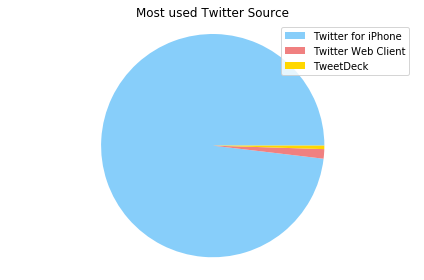

In [220]:
#Visualizing Twitter Sources
labels = ['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck']
sizes = [1572,22,8]
colors = ['lightskyblue', 'lightcoral','gold']
patches, texts = plt.pie(sizes,colors=colors)
plt.legend(patches,labels, loc ="best")
plt.axis('equal')
plt.title('Most used Twitter Source')
plt.tight_layout()
plt.show()

*Twitter for iPhone* is the most used Twitter source

### Top 10 Dog Breeds

Let's find out what are the most common Dog Breeds based on twitter counts

In [221]:
df_clean_analysis.breed.value_counts()[0:10].sort_values(ascending = False)

golden_retriever      153
Labrador_retriever    102
Pembroke               91
Chihuahua              89
pug                    58
toy_poodle             51
chow                   44
Pomeranian             41
Samoyed                37
malamute               32
Name: breed, dtype: int64

#### Dog Breeds Visualization

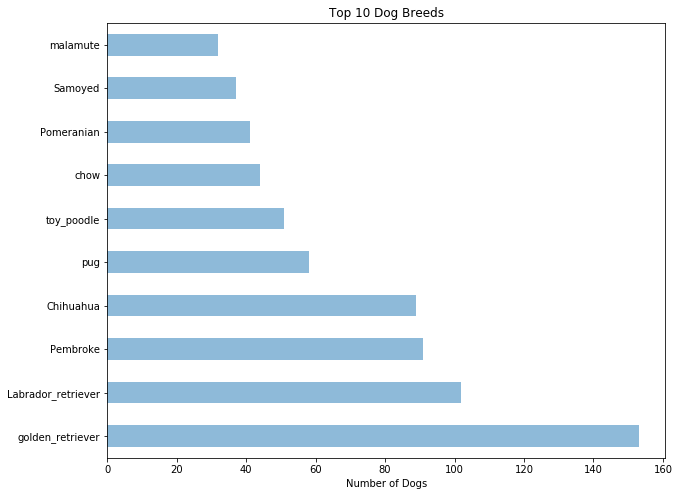

In [222]:
df_clean_analysis.breed.value_counts()[0:10].plot('barh', figsize = (10,8), title = "Top 10 Dog Breeds", alpha = 0.5);
plt.xlabel('Number of Dogs');

*Golden Retriever* is the top one breed that appears in more tweets, followed by *Labrador Retriever* Breed.

### Stage by Rating Numerator ###

Considering that Rating Numerators scores, let's take a look at the different Dog Stages to find out how different Stages are rated.

In [223]:
#Descriptive information about the dog's Stages
df_clean_analysis['stage'].value_counts()

None       1320
pupper      190
doggo        58
puppo        27
floofer       7
Name: stage, dtype: int64

#### Stage by Rating Numerator Visualization

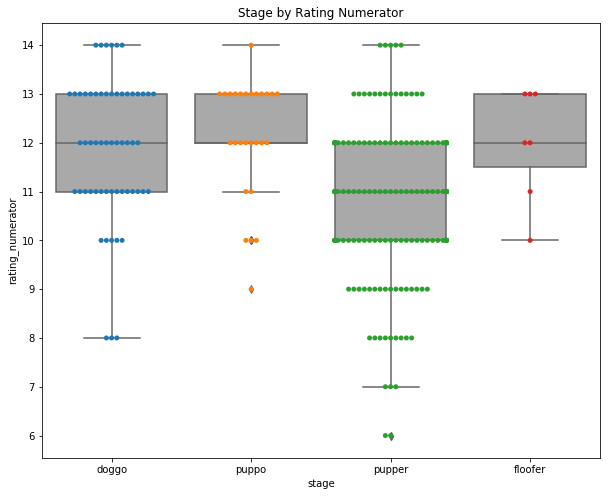

In [224]:
import seaborn as sns
#Replacing Stage with name "None" as NaN
df_clean_analysis['stage'].replace('None', np.nan, inplace=True)

#Creating a swarmplot over a boxplot to see where data points are concentrated
plt.figure(figsize=(10,8))
sns.boxplot(x='stage', y ='rating_numerator', data=df_clean_analysis, color='darkgray').set_title("Stage by Rating Numerator");
sns.swarmplot(x='stage', y ='rating_numerator', data=df_clean_analysis);

*Pupper* is the Stage that shows more variation in numerator ratings.

*Puppo* and *floffer* are the stages with less count of ratings, however the few ratings given are high ratings, between 12 and 13.

*doggo* stage seems to have high ratings most of them are concentrated between 11 to 13, however there are also a good number or ratings with value 14

### About Rating Numerator ###

Considering that Rating Numerators vary from 4 - 16 where 4 is the lowest rating received and 16 is the highest, let's take a look at the distribution and statistics of Rating Numerator

In [225]:
# Descriptive information about the dog's rating Numerator
df_clean_analysis['rating_numerator'].describe()

count    1602.000000
mean       10.864544
std         1.733242
min         4.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        16.000000
Name: rating_numerator, dtype: float64

#### Rating Numerator Visualization

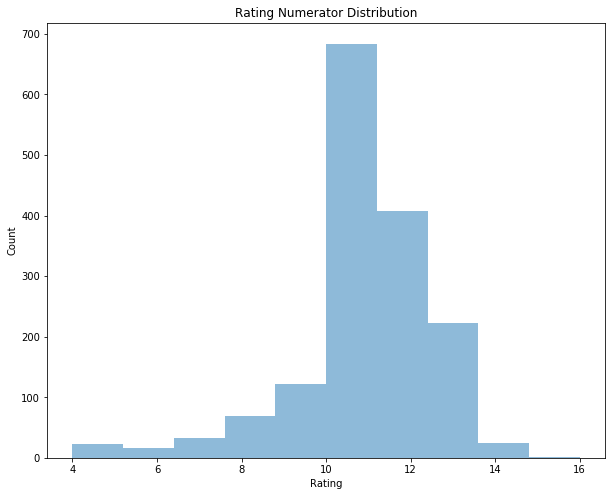

In [226]:
#Rating Numerator Distribution
plt.figure(figsize=(10,8))
plt.hist(df_clean_analysis['rating_numerator'], alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Numerator Distribution');


*Rating Numerator* Distribution is a little bit Negative skewed where the great majority of counts of rating numerators are above 10, which makes sense based on the way Dogs get rated.

### Retweets and Favorite Tweets over Time

In [227]:
#Retweet Count Statistics
df_clean_analysis.retweet_count.describe()

count     1602.000000
mean      2630.825218
std       4856.950015
min         11.000000
25%        592.250000
50%       1305.000000
75%       2954.500000
max      83264.000000
Name: retweet_count, dtype: float64

In [228]:
#Favorite Count Statistics
df_clean_analysis.favorite_count.describe()

count      1602.000000
mean       8783.049313
std       13072.335645
min          78.000000
25%        1991.250000
50%        4004.500000
75%       10862.500000
max      163731.000000
Name: favorite_count, dtype: float64

#### Visualization

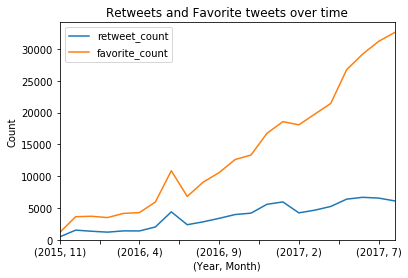

In [229]:
#Plotting Retweets and Favorite 
df_clean_analysis.retweet_count.groupby([df_clean_analysis["timestamp"].dt.year, df_clean_analysis["timestamp"].dt.month]).mean().plot('line')
df_clean_analysis.favorite_count.groupby([df_clean_analysis["timestamp"].dt.year, df_clean_analysis["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweets and Favorite tweets over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(loc ='best');

We can clearly see from above visualization how favorite counts grows almost exponentially over time, compared to retweet counts that even though still shows some increment, it is not as noticieable as favorite counts.